<a href="https://colab.research.google.com/github/Ak-sharma07/ml/blob/main/ABHISHEKSHARMA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

**DATA COLLECTION**

In [145]:
df1=pd.read_csv('/content/Study Hour(Linear Regression).csv')
df2=pd.read_csv('/content/placement-dataset.csv')
df3=pd.read_csv('/content/CarPrice_Assignment.csv')
df4=pd.read_csv('/content/wineQualityReds.csv')

**DATA INTEGRATION**

In [42]:
# Concatenate datasets along columns
merged_df = pd.concat([df1, df2], axis=1)
# Display the merged DataFrame
print(merged_df)

    Hours  Scores         city  cgpa     iq  placement
0     2.5    21.0     New York   6.8  123.0          1
1     5.1    47.0  Los Angeles   5.9  106.0          0
2     3.2    27.0      Chicago   NaN  121.0          0
3     8.5    75.0     New York   7.4  132.0          1
4     3.5    30.0  Los Angeles   5.8  142.0          0
..    ...     ...          ...   ...    ...        ...
95    NaN     NaN      Chicago   4.3  200.0          0
96    NaN     NaN     New York   4.4   42.0          0
97    NaN     NaN  Los Angeles   6.7  182.0          1
98    NaN     NaN      Chicago   6.3  103.0          1
99    NaN     NaN     New York   6.2  113.0          1

[100 rows x 6 columns]


**DATA REDUCTION**

In [43]:
# Check for duplicates
duplicates = merged_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Remove duplicates
merged_df.drop_duplicates(inplace=True)

Number of duplicate rows: 1


CHECKING FOR NULL VALUES

In [44]:
merged_df.isnull().sum()

Hours        74
Scores       74
city          0
cgpa          7
iq            4
placement     0
dtype: int64

FILLING NULL VALUES

In [45]:
numerical_columns = ['Hours','Scores','cgpa','iq']

for col in numerical_columns:
    mean_value = merged_df[col].mean()
    merged_df[col].fillna(mean_value, inplace=True)

In [47]:

categorical_columns = ['city']
for col in categorical_columns:
    most_frequent_value = merged_df[col].mode()[0]
    merged_df[col].fillna(most_frequent_value, inplace=True)

In [48]:

# Display the merged DataFrame
print(merged_df)

    Hours  Scores         city      cgpa     iq  placement
0   2.500   21.00     New York  6.800000  123.0          1
1   5.100   47.00  Los Angeles  5.900000  106.0          0
2   3.200   27.00      Chicago  5.965217  121.0          0
3   8.500   75.00     New York  7.400000  132.0          1
4   3.500   30.00  Los Angeles  5.800000  142.0          0
..    ...     ...          ...       ...    ...        ...
95  5.012   51.48      Chicago  4.300000  200.0          0
96  5.012   51.48     New York  4.400000   42.0          0
97  5.012   51.48  Los Angeles  6.700000  182.0          1
98  5.012   51.48      Chicago  6.300000  103.0          1
99  5.012   51.48     New York  6.200000  113.0          1

[99 rows x 6 columns]


In [49]:
merged_df.isnull().sum()

Hours        0
Scores       0
city         0
cgpa         0
iq           0
placement    0
dtype: int64

In [50]:
merged_df.head()

,Hours,Scores,city,cgpa,iq,placement
0,2.5,21.0,New York,6.800000,123.0,1
1,5.1,47.0,Los Angeles,5.900000,106.0,0
2,3.2,27.0,Chicago,5.965217,121.0,0
3,8.5,75.0,New York,7.400000,132.0,1
4,3.5,30.0,Los Angeles,5.800000,142.0,0


In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hours      99 non-null     float64
 1   Scores     99 non-null     float64
 2   city       99 non-null     object 
 3   cgpa       99 non-null     float64
 4   iq         99 non-null     float64
 5   placement  99 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 5.4+ KB


In [52]:
merged_df.dtypes

Hours        float64
Scores       float64
city          object
cgpa         float64
iq           float64
placement      int64
dtype: object

**DATA TRANSFORMATION**

In [53]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = merged_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    merged_df[col] = label_encoder.fit_transform(merged_df[col])
    print(merged_df)

# Perform one-hot encoding if needed
# merged_df = pd.get_dummies(merged_df, columns=['categorical_column_name'])

    Hours  Scores  city      cgpa     iq  placement
0   2.500   21.00     2  6.800000  123.0          1
1   5.100   47.00     1  5.900000  106.0          0
2   3.200   27.00     0  5.965217  121.0          0
3   8.500   75.00     2  7.400000  132.0          1
4   3.500   30.00     1  5.800000  142.0          0
..    ...     ...   ...       ...    ...        ...
95  5.012   51.48     0  4.300000  200.0          0
96  5.012   51.48     2  4.400000   42.0          0
97  5.012   51.48     1  6.700000  182.0          1
98  5.012   51.48     0  6.300000  103.0          1
99  5.012   51.48     2  6.200000  113.0          1

[99 rows x 6 columns]


**DATA VISUALIZATION**

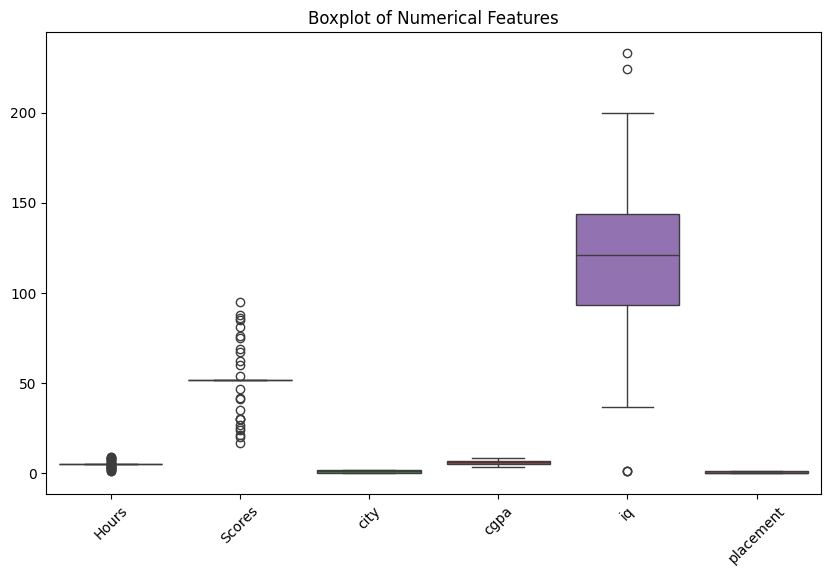

In [54]:
# Visualize outliers with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

**HANDLING OUTLIERS**

In [56]:
# Handle outliers
from scipy.stats import zscore

z_scores = zscore(merged_df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)
threshold = 3
outliers_mask = (abs_z_scores > threshold).any(axis=1)
merged_df = merged_df[~outliers_mask]

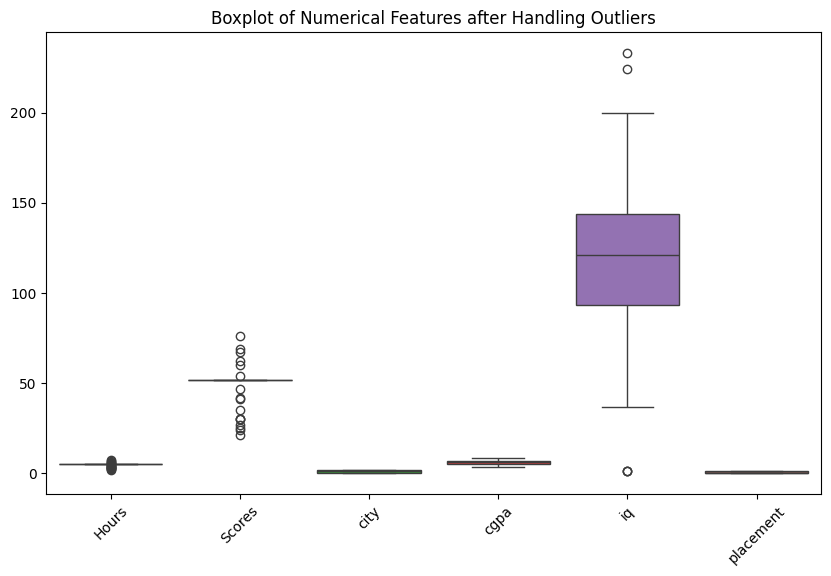

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers with boxplot after handling
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features after Handling Outliers')
plt.xticks(rotation=45)
plt.show()


**STANDARDIZATION**

In [58]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])

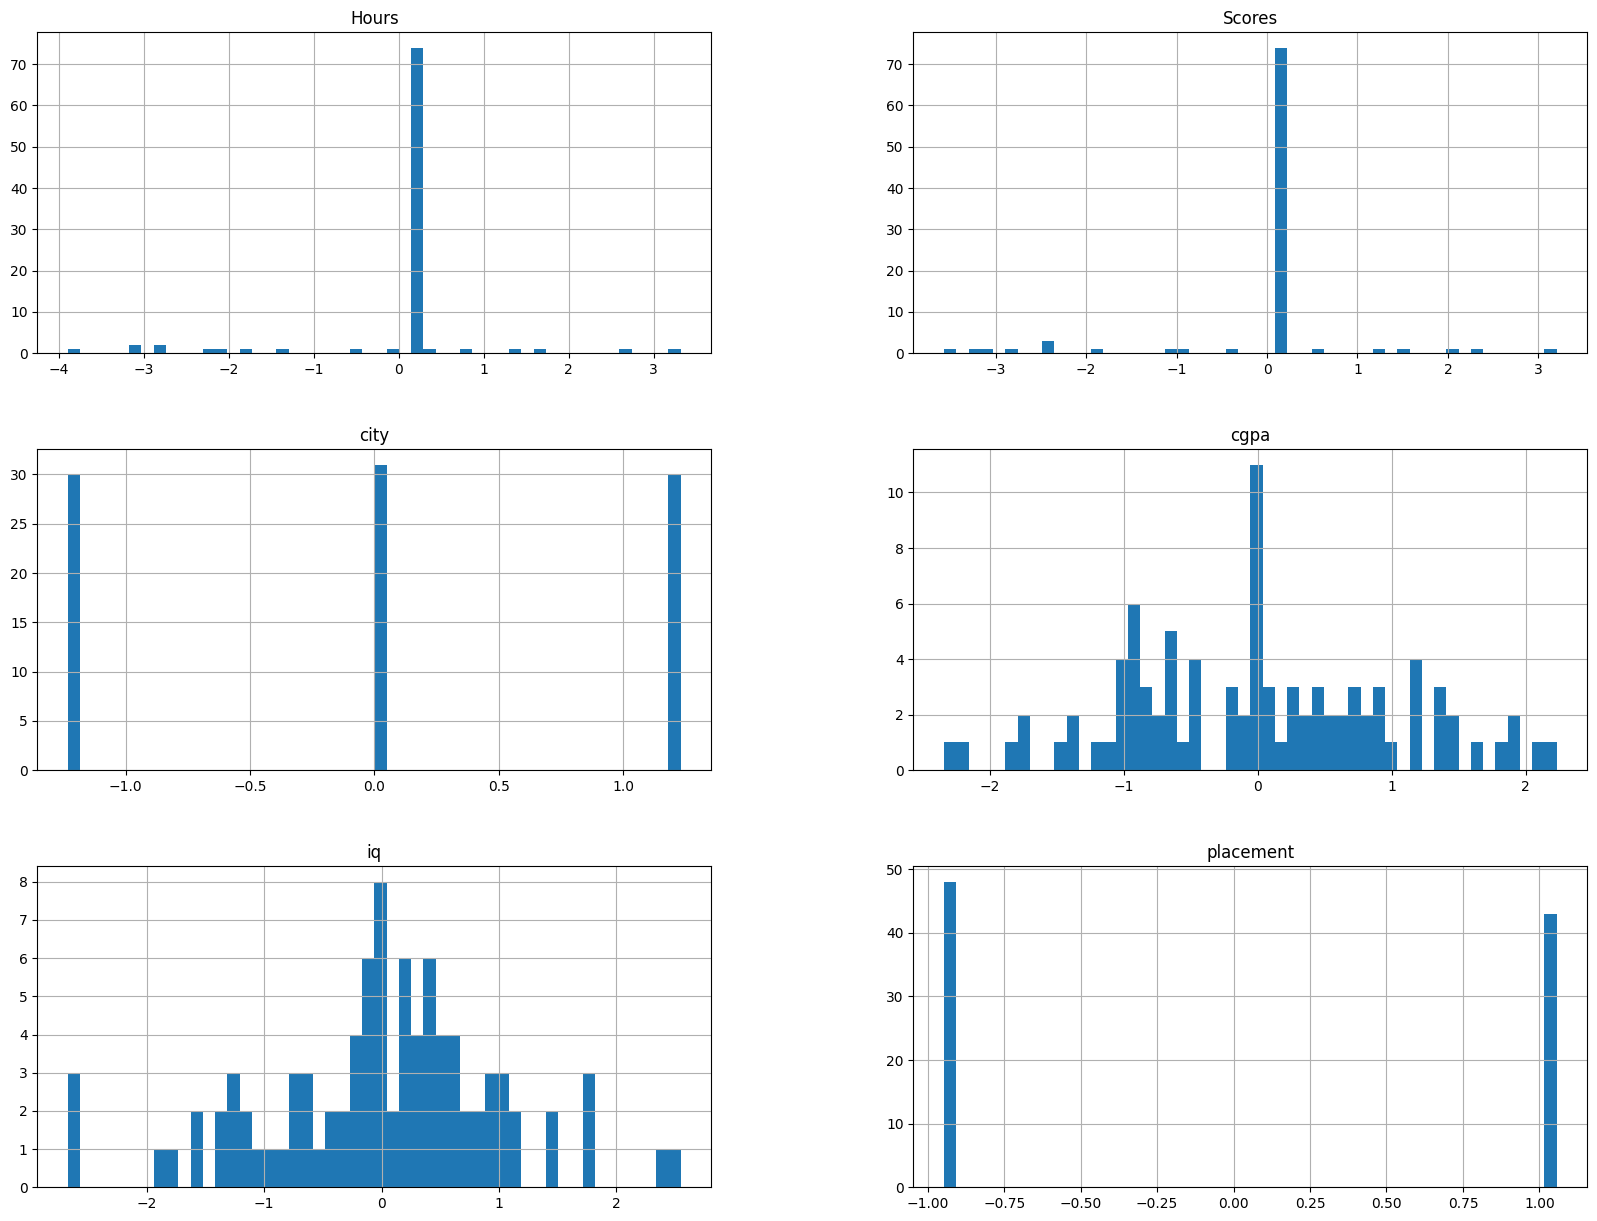

In [59]:
merged_df.hist(bins=50,figsize=(20,15))
plt.show()

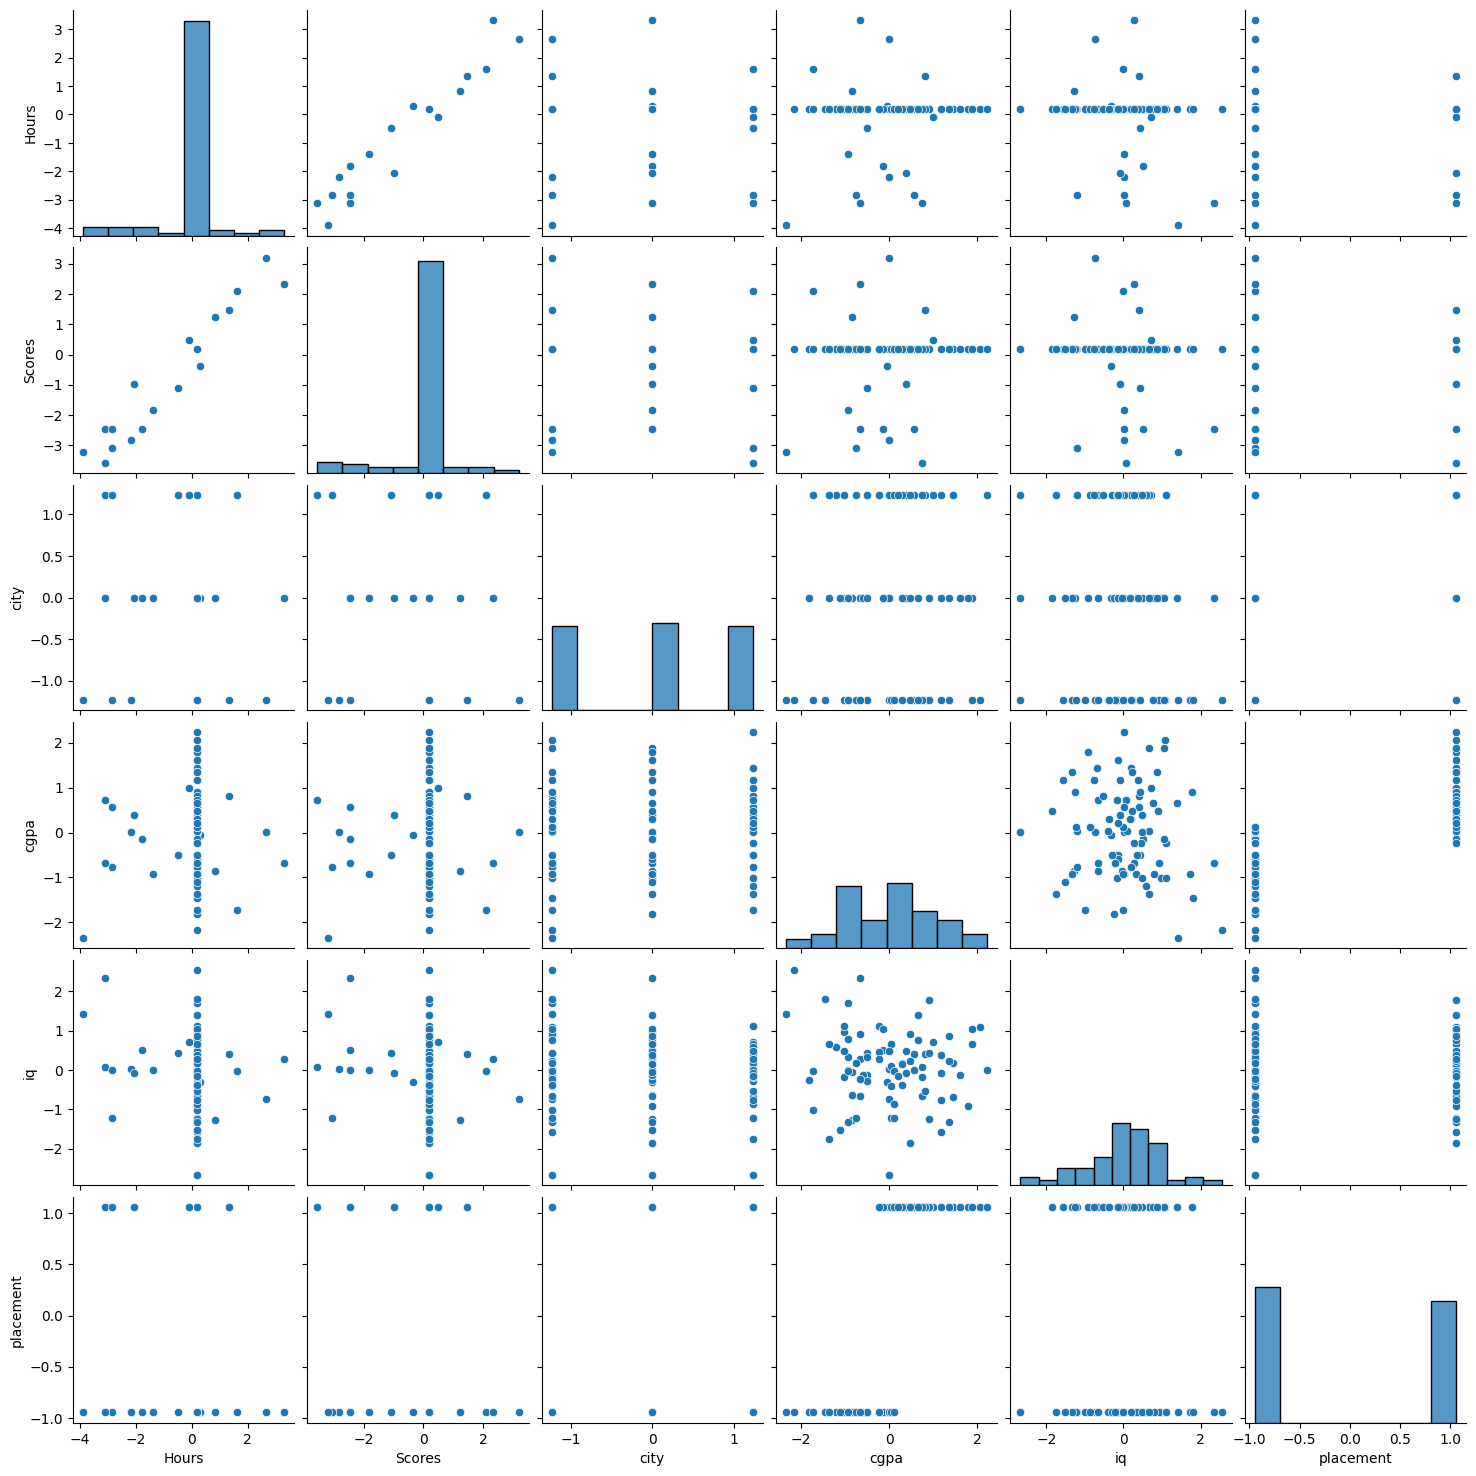

In [60]:
# Visualizations (histograms, pairplots, correlation matrices, etc.)
sns.pairplot(merged_df)
plt.show()


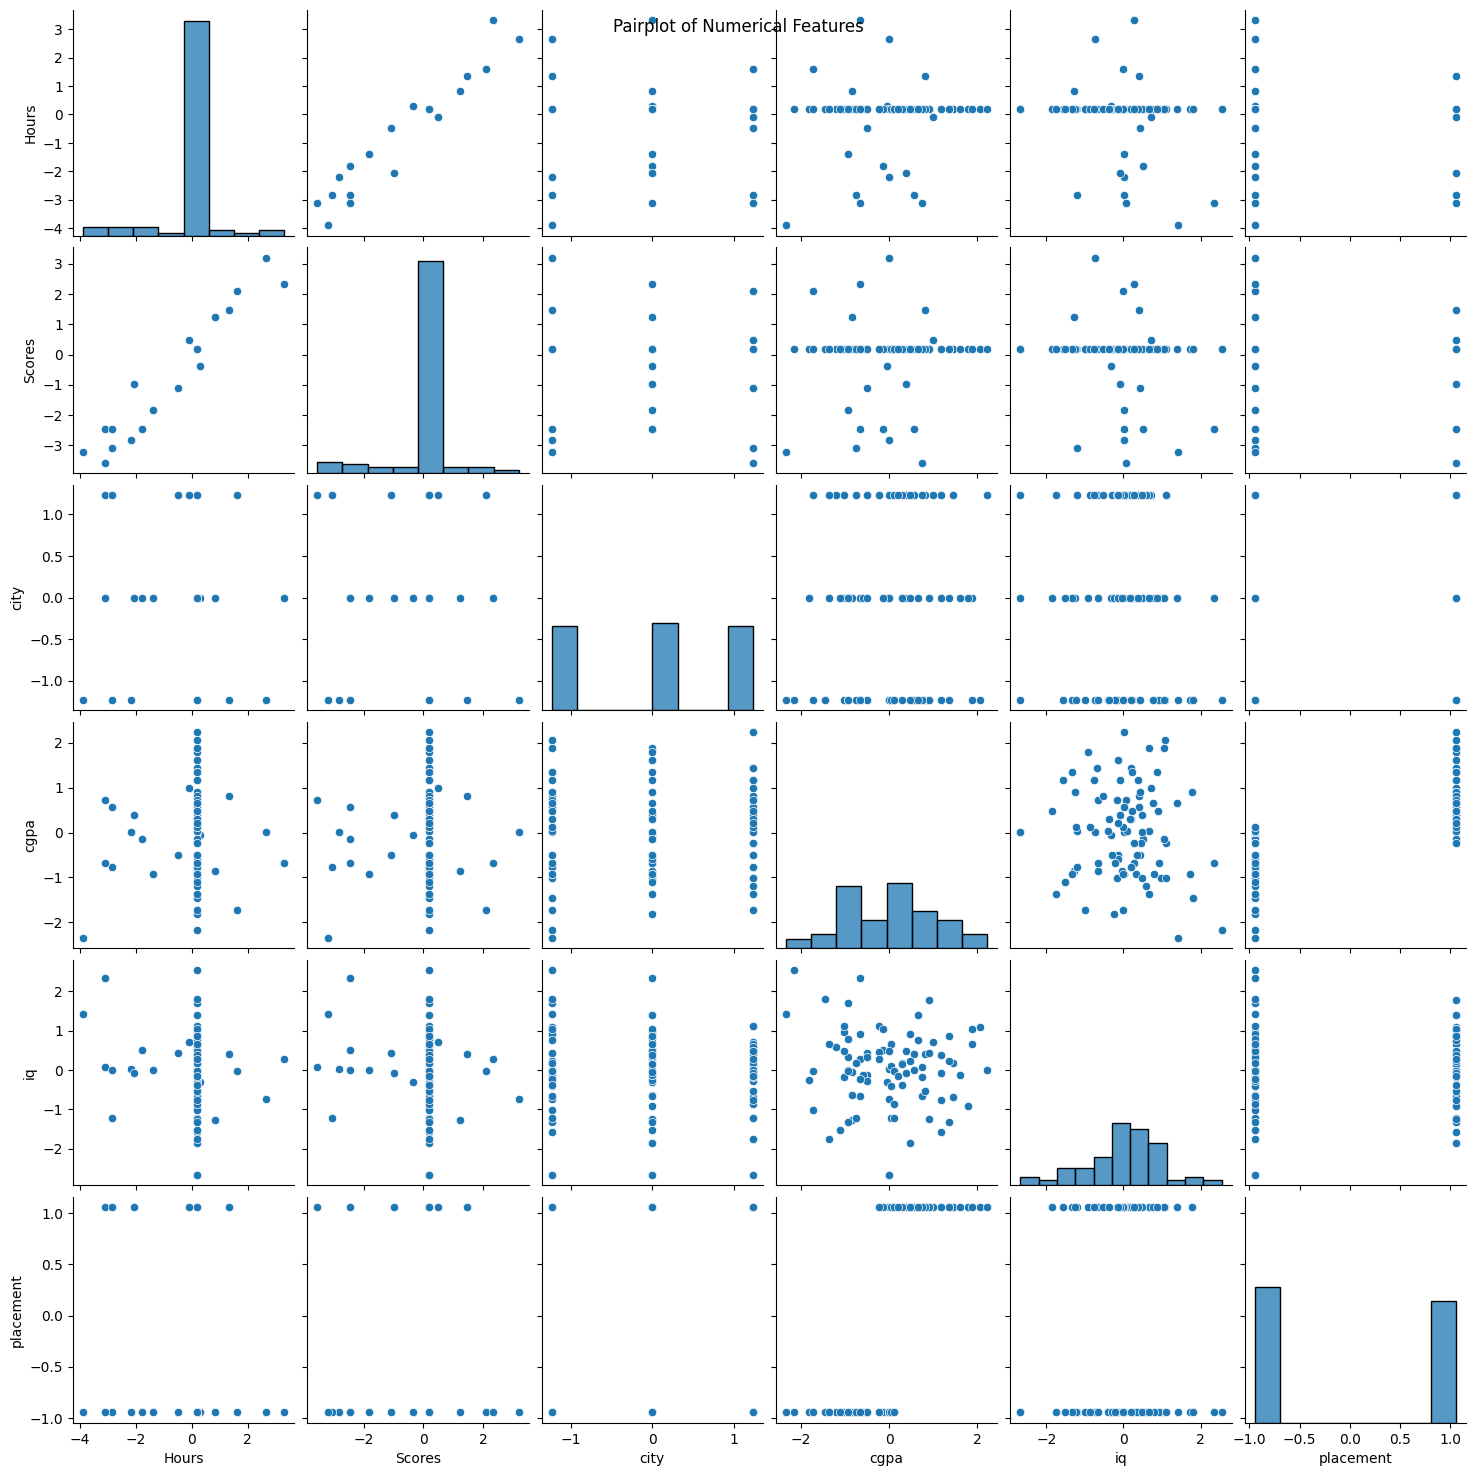

In [61]:
# Plot pairplot
sns.pairplot(merged_df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Numerical Features')
plt.show()

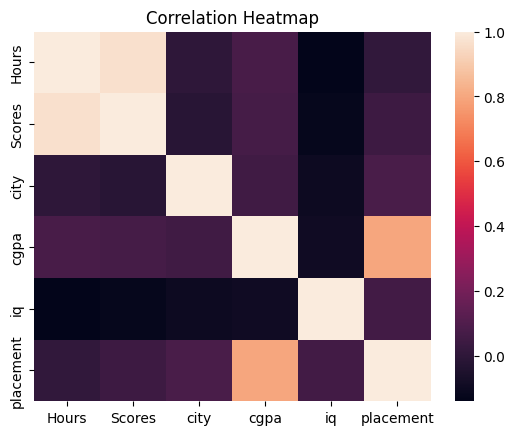

In [62]:
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Heatmap')
plt.show()

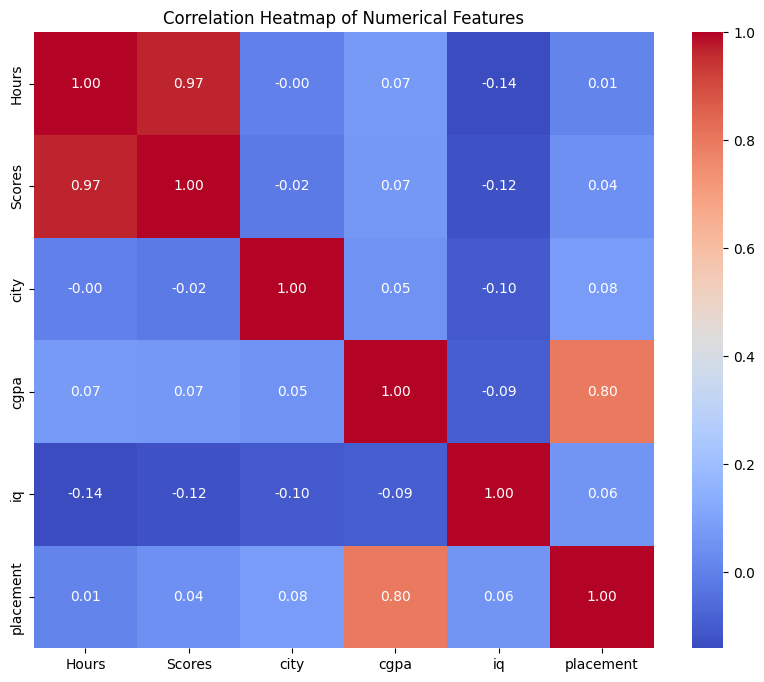

In [63]:
# Calculate correlation matrix
corr_matrix = merged_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**LINEAR REGRESSION**

In [86]:
df3.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [87]:
# converting attributes into list
x =df3['horsepower'].tolist()
y =df3['price'].tolist()
n=np.size(y)

In [88]:
#correlation code between orignal price and discounted price
df=pd.DataFrame(df3['horsepower'],df3['price'])
corr=df.corr()
print(corr)

            horsepower
horsepower         NaN


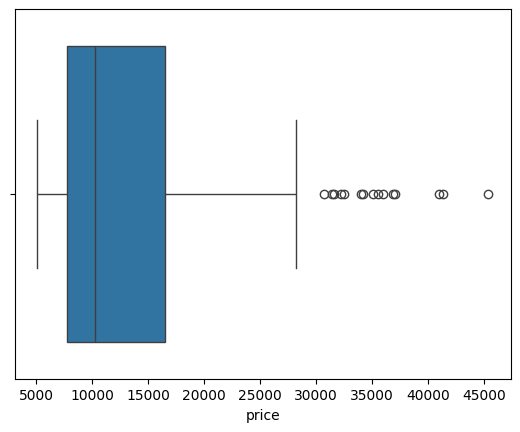

In [90]:
#using boxplot to get a overview of the datapoints for preprocessing
sns.boxplot(x=df3['price'])
plt.show()

In [91]:
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

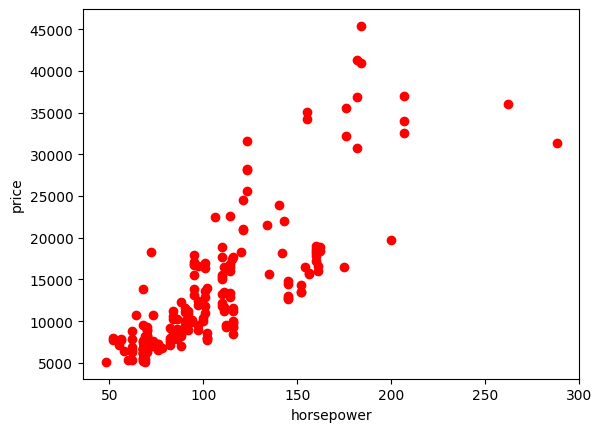

In [94]:
# ploting scatterplot to visualize the data
plt.scatter(x, y, color = 'red')
plt.xlabel("horsepower")
plt.ylabel("price")
plt.show()

In [95]:
# Initialize parameters
a0 = 0          # Intercept
a1 = 1          # Slope one
a2 = 1          # Slope two
lr = 0.0001     # Learning rate
iterations = 1000   # Number of iterations
error = []      # Error array to calculate cost for each iteration

for itr in range(iterations):
    error_cost = 0
    # Initialize gradients
    grad_a0 = 0
    grad_a1 = 0
    grad_a2 = 0

    for i in range(len(x_normalized )):  # Assuming len(x1) == len(x2) == len(y)
        # Linear equation predicted value
        y_pred = a0 + a1 * x_normalized[i]
        # Cost function calculation
        error_cost += (y[i] -y_pred) ** 2

        # Gradient descent calculation
        grad_a0 += -2 * (y[i] - y_pred)  # Partial derivative w.r.t a0
        grad_a1 += -2 * x_normalized[i] * (y[i] - y_pred)  # Partial derivative w.r.t a1

    # Update parameters
    a0 -= lr * grad_a0
    a1 -= lr * grad_a1
    a2 -= lr * grad_a2

    # Calculate and append the error for this iteration
    error.append(error_cost)

    # Print iteration and updated parameters (optional)
    print(itr, a0, a1, a2)

# After the loop, you can visualize the error trend or use the parameters for prediction.


0 544.3451333999998 265.01277096107 1.0
1 1066.3721163306 518.2010183127361 1.0
2 1566.9959929610452 761.0085475229838 1.0
3 2047.094290649643 993.8609680356112 1.0
4 2507.5085581330077 1217.1664393072213 1.0
5 2949.0458406495545 1431.316386256695 1.0
6 3372.480094582923 1636.6861853812404 1.0
7 3778.553544105023 1833.6358227416795 1.0
8 4167.977982196717 2022.5105249703406 1.0
9 4541.436018326652 2203.6413644076265 1.0
10 4899.582274975259 2377.3458394279837 1.0
11 5243.044535101273 2543.9284309725062 1.0
12 5572.424842562121 2703.681136263703 1.0
13 5888.300557417074 2856.883980637961 1.0
14 6191.225367962974 3003.8055083928743 1.0
15 6481.7302612764925 3144.7032535098365 1.0
16 6760.324453964156 3279.824191077003 1.0
17 7027.496284751625 3409.4051702039155 1.0
18 7283.714070476809 3533.673329186625 1.0
19 7529.426926987259 3652.846493651043 1.0
20 7765.065556380781 3767.1335583724203 1.0
21 7991.043001969169 3876.734853440221 1.0
22 8207.755372288433 3981.8424954102416 1.0
23 8415.5

PRINTING UPDATED VALUES OF INTERCEPT AND SLOPE

In [96]:
#printing out comes to intercept and slope value
print(a0)
print(a1)

13276.710570731684
6440.335877099253


Predicting the values

In [97]:
pred = a0 + a1 * x_normalized
print(pred)

[14400.43827331 14400.43827331 21420.749895   12931.07072458
 15053.49051719 14237.17521234 14237.17521234 14237.17521234
 19135.06704143 22400.32826082 12767.80766361 12767.80766361
 16033.068883   16033.068883   16033.068883   25992.11560215
 25992.11560215 25992.11560215  4114.86543222  7706.65277355
  7706.65277355  7380.12665161  7380.12665161 12931.07072458
  7380.12665161  7380.12665161  7380.12665161 12931.07072458
 10645.38787101 19951.38234628  5747.49604192  8686.23113937
  6074.02216386  8686.23113937  8686.23113937  8686.23113937
  8686.23113937 10318.86174907 10318.86174907 10318.86174907
 10318.86174907 12767.80766361 12604.54460264  9012.75726131
  7706.65277355  7706.65277355 10971.91399295 25012.53723634
 25012.53723634 39053.16047972  7380.12665161  7380.12665161
  7380.12665161  7380.12665161  7380.12665161 12767.80766361
 12767.80766361 12767.80766361 18318.75173658  9992.33562713
  9992.33562713  9992.33562713  9992.33562713  6727.07440773
  9992.33562713 15869.80

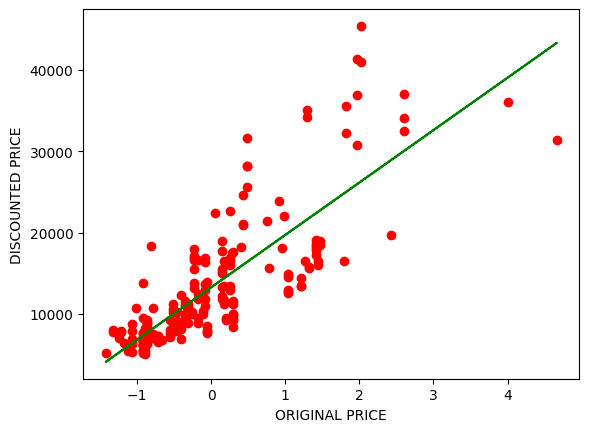

In [98]:
plt.scatter(x_normalized,y,color = 'red')
plt.plot(x_normalized,pred, color = 'green')
plt.xlabel("ORIGINAL PRICE")
plt.ylabel("DISCOUNTED PRICE")
plt.show()

In [99]:
#Analyze the performance of the model by calculating the mean squared error
error1 = y - pred
se = np.sum(error1 ** 2)
mse = se/n
print("mean squared error is", mse)

mean squared error is 22032509.70230993


**MULTIVARIATE REGRESSION**

Normal Visualizattion of Data

In [100]:
# converting attributes into list
x1 =df3['citympg'].tolist()
x2 =df3['highwaympg'].tolist()
y  =df3['price'].tolist()
n=np.size(x1)

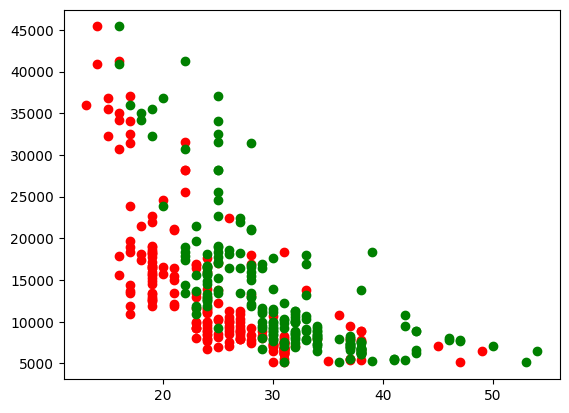

In [101]:
# ploting scatterplot to visualize the data
plt.scatter(x1, y, color = 'red')
plt.scatter(x2, y,color = 'green')
plt.show()

Outliers Handling Using Normalization

In [102]:
#correlation of the attributes
d=pd.DataFrame({'A':x1,'B':x2,'C':y}).corr()
print(d)

          A         B         C
A  1.000000  0.971337 -0.685751
B  0.971337  1.000000 -0.697599
C -0.685751 -0.697599  1.000000


In [103]:
#calculating the normalized value for x1
x1_mean = np.mean(x1)
x1_std = np.std(x1)
x1_normalized = (x1 - x1_mean) / x1_std

In [104]:
#calculating the normalized value for x2
x2_mean = np.mean(x2)
x2_std = np.std(x2)
x2_normalized = (x2 - x2_mean) / x2_std

In [105]:
# Initialize parameters
a0 = 0          # Intercept
a1 = 1          # Slope one
a2 = 1          # Slope two
lr = 0.0001     # Learning rate
iterations = 1000   # Number of iterations
error = []      # Error array to calculate cost for each iteration

for itr in range(iterations):
    error_cost = 0
    # Initialize gradients
    grad_a0 = 0
    grad_a1 = 0
    grad_a2 = 0

    for i in range(len(x1_normalized )):  # Assuming len(x1) == len(x2) == len(y)
        # Linear equation predicted value
        y_pred = a0 + a1 * x1_normalized[i] + a2 * x2_normalized[i]
        # Cost function calculation
        error_cost += (y[i] -y_pred) ** 2

        # Gradient descent calculation
        grad_a0 += -2 * (y[i] - y_pred)  # Partial derivative w.r.t a0
        grad_a1 += -2 * x1_normalized[i] * (y[i] - y_pred)  # Partial derivative w.r.t a1
        grad_a2 += -2 * x2_normalized[i] * (y[i] - y_pred)  # Partial derivative w.r.t a2

    # Update parameters
    a0 -= lr * grad_a0
    a1 -= lr * grad_a1
    a2 -= lr * grad_a2

    # Calculate and append the error for this iteration
    error.append(error_cost)

    # Print iteration and updated parameters (optional)
    print(itr, a0, a1, a2)

# After the loop, you can visualize the error trend or use the parameters for prediction.


0 544.3451333999999 -223.14533102727856 -227.01650323373266
1 1066.3721163305995 -429.0199875723291 -436.75778265619056
2 1566.9959929610452 -618.1008747645674 -629.7007487430758
3 2047.094290649642 -791.7455269311195 -807.2029411615179
4 2507.5085581330068 -951.2017557205281 -970.5121768937876
5 2949.0458406495536 -1097.6165184186116 -1120.775418553163
6 3372.480094582922 -1232.044069484299 -1259.0469259197723
7 3778.5535441050224 -1355.4534532390585 -1386.2957486300295
8 4167.977982196716 -1468.7353909610622 -1503.412613270806
9 4541.436018326651 -1572.7086113312112 -1611.2162538254645
10 4899.582274975258 -1668.1256692220093 -1710.4592304627379
11 5243.044535101272 -1755.6782941838799 -1801.8332780230558
12 5572.42484256212 -1836.0023066410456 -1885.9742222144293
13 5888.300557417073 -1909.6821367367666 -1963.4664984576982
14 6191.225367962972 -1977.2549779437313 -2034.8473054969286
15 6481.73026127649 -2039.2146049596408 -2100.610423295004
16 6760.324453964154 -2096.014883022073 -2

In [106]:
#PRINTING UPDATED VALUES OF INTERCEPT AND SLOPE
print(a0)
print(a1)
print(a2)



13276.710570731688
-1657.316520099526
-3935.02741202458


In [107]:
pred = a0 + a1 * x1_normalized + a2 * x2_normalized
print(pred)

[16497.00968305 16497.00968305 17577.72402872 14016.71514735
 20122.93490835 18150.53937352 18150.53937352 18150.53937352
 21522.51509838 20630.83390922 14843.47999259 14843.47999259
 15924.19433825 15924.19433825 17896.58987308 20630.83390922
 20630.83390922 22030.41409925 -4998.876293    3014.82265889
  3014.82265889  4414.40284892  7656.54588593 14016.71514735
  7656.54588593  7656.54588593  7656.54588593 14016.71514735
 14016.71514735 18723.35471832 -6079.59063867  7656.54588593
  3587.63800369 10201.75676555 10201.75676555 10201.75676555
 10201.75676555 11536.42061166 11536.42061166 11536.42061166
 11536.42061166 15162.34583695 13189.95030212 14589.53049215
  3014.82265889  3014.82265889 14589.53049215 22603.22944404
 22603.22944404 24256.75913451 11920.20279995  7656.54588593
  7656.54588593  7656.54588593  7656.54588593 19804.06906398
 19804.06906398 19804.06906398 20058.01856442 12363.18545689
 12363.18545689 12363.18545689 12363.18545689  4095.53700456
 12363.18545689 17004.90

In [108]:
#Analyze the performance of the model by calculating the mean squared error
error1 = y - pred
se = np.sum(error1 ** 2)
mse = se/n
print("mean squared error is", mse)

mean squared error is 32543624.80863291


**LASSO REGRESSION**

CALCULATING AND UPATING THE INTERCEPT AND SLOPE

In [109]:
# lasso regression function to update intercept and slope
def lasso(grad_a0, grad_a1, grad_a2):
    global a0, a1, a2, lambda_val, lr
    a0 -= lr * (grad_a0 + 2 * lambda_val * abs(a0))
    a1 -= lr * (grad_a1 + 2 * lambda_val * abs(a1))
    a2 -= lr * (grad_a2 + 2 * lambda_val * abs(a2))
    return a0, a1, a2


In [110]:
# Initialize parameters
a0 = 0          # Intercept
a1 = 1          # Slope one
a2 = 1          # Slope two
lr = 0.0001     # Learning rate
iterations = 1000   # Number of iterations
error = []      # Error array to calculate cost for each iteration
lambda_val = 0.01  # Regularization parameter (lambda) for lasso regression

for itr in range(iterations):
    error_cost = 0
    # Initialize gradients
    grad_a0 = 0
    grad_a1 = 0
    grad_a2 = 0

    for i in range(len(x1_normalized)):  # Assuming len(x1) == len(x2) == len(y)
        # Linear equation predicted value
        y_pred = a0 + a1 * x1_normalized[i] + a2 * x2_normalized[i]
        # Cost function calculation
        error_cost += (y[i] - y_pred) ** 2

        # Gradient descent calculation
        grad_a0 += -2 * (y[i] - y_pred)  # Partial derivative w.r.t a0
        grad_a1 += -2 * x1_normalized[i] * (y[i] - y_pred)  # Partial derivative w.r.t a1
        grad_a2 += -2 * x2_normalized[i] * (y[i] - y_pred)  # Partial derivative w.r.t a2

    # Update parameters with lasso regularization
    lasso(grad_a0,grad_a1,grad_a2)

    # Calculate and append the error for this iteration
    error.append(error_cost)

    # Print iteration and updated parameters (optional)
    print(itr, a0 , a1 ,a2)



0 544.3451333999999 -223.14533302727855 -227.01650523373266
1 1066.3710276403335 -429.0204357013453 -436.75823852755116
2 1566.9928161650246 -618.102144406171 -629.702041593531
3 2047.088110116627 -791.7479292341709 -807.2053898459409
4 2507.4985368256253 -951.2055455065996 -970.5160439216454
5 2949.0312152187007 -1097.6219012308618 -1120.7809171374233
6 3372.4601707323036 -1232.0512078649278 -1259.05422625439
7 3778.527692211938 -1355.4624723139946 -1386.3049834746655
8 4167.945633175864 -1468.7463834028567 -1503.4238829137546
9 4541.396659724387 -1572.7216417641712 -1611.2296304888157
10 4899.535447282368 -1668.140778127308 -1710.4747622075222
11 5242.989828272896 -1755.695501356697 -1801.8509922064134
12 5572.361892734051 -1836.0216142466386 -1885.9941285457153
13 5888.22904380817 -1909.7035320077237 -1963.4885916957655
14 6191.145009953947 -1977.278435556442 -2034.871567826631
15 6481.6408156558155 -2039.240089124219 -2100.63682641715
16 6760.225712332295 -2096.0423493165276 -2161.

In [111]:
# Print the minimum error values of a0, a1, and a2
print(a0,a1,a2)
pred = a0 + a1 * x1_normalized + a2 * x2_normalized
print(pred)

13276.062957904473 -1656.464576611158 -3936.0177407863043
[16496.35202126 16496.35202126 17576.94944196 14016.01663225
 20122.60642085 18149.90894726 18149.90894726 18149.90894726
 21522.34438914 20630.24433626 14842.79509525 14842.79509525
 15923.39251596 15923.39251596 17896.08998955 20630.24433626
 20630.24433626 22029.98230455 -4999.88801676  3014.07765554
  3014.07765554  4413.81562384  7655.60788596 14016.01663225
  7655.60788596  7655.60788596  7655.60788596 14016.01663225
 14016.01663225 18722.86845255 -6080.48543746  7655.60788596
  3587.03716084 10201.26486484 10201.26486484 10201.26486484
 10201.26486484 11535.68124325 11535.68124325 11535.68124325
 11535.68124325 15161.93564285 13189.23816925 14588.97613755
  3014.07765554  3014.07765554 14588.97613755 22602.94180985
 22602.94180985 24256.49873585 11920.14338073  7655.60788596
  7655.60788596  7655.60788596  7655.60788596 19803.46587326
 19803.46587326 19803.46587326 20057.28483096 12362.45970625
 12362.45970625 12362.45970

Analyze the performance of the model by calculating the mean squared error

In [112]:
error1 = y - pred
se = np.sum(error1 ** 2)
n=len(y)
mse = se/n
print("mean squared error is", mse)

mean squared error is 32543571.624812283


**RIDGE REGULARIZATION**

In [113]:
# ridge regression function to update intercept and slope
def ridge(grad_a0, grad_a1, grad_a2):
    global a0, a1, a2, lambda_val, lr
    a0 -= lr * (grad_a0 + 2 * lambda_val * a0)
    a1 -= lr * (grad_a1 + 2 * lambda_val * a1)
    a2 -= lr * (grad_a2 + 2 * lambda_val * a2)
    return a0, a1, a2


In [114]:
# Initialize parameters
a0 = 0          # Intercept
a1 = 1          # Slope one
a2 = 1          # Slope two
lr = 0.0001     # Learning rate
iterations = 1000   # Number of iterations
error = []      # Error array to calculate cost for each iteration
lambda_val = 0.01  # Regularization parameter (lambda) for Ridge regression

for itr in range(iterations):
    error_cost = 0
    # Initialize gradients
    grad_a0 = 0
    grad_a1 = 0
    grad_a2 = 0

    for i in range(len(x1_normalized)):  # Assuming len(x1) == len(x2) == len(y)
        # Linear equation predicted value
        y_pred = a0 + a1 * x1_normalized[i] + a2 * x2_normalized[i]
        # Cost function calculation
        error_cost += (y[i] - y_pred) ** 2

        # Gradient descent calculation
        grad_a0 += -2 * (y[i] - y_pred)  # Partial derivative w.r.t a0
        grad_a1 += -2 * x1_normalized[i] * (y[i] - y_pred)  # Partial derivative w.r.t a1
        grad_a2 += -2 * x2_normalized[i] * (y[i] - y_pred)  # Partial derivative w.r.t a2

    # Update parameters with rigid regularization
    a0,a1,a2 = ridge(grad_a0,grad_a1,grad_a2)

    # Calculate and append the error for this iteration
    error.append(error_cost)

    # Print iteration and updated parameters (optional)
    print(itr, a0, a1, a2)

# After the loop, you can visualize the error trend or use the parameters for prediction.

0 544.3451333999999 -223.14533302727855 -227.01650523373266
1 1066.3710276403335 -429.0195431200132 -436.7573304615303
2 1566.9928161650241 -618.0996085042806 -629.6994592739686
3 2047.088110116626 -791.7431277411606 -807.2004955903118
4 2507.498536825624 -951.1979688055322 -970.508312737315
5 2949.0312152187 -1097.611138260524 -1120.7699226236837
6 3372.460170732303 -1232.036933564812 -1259.039628047377
7 3778.527692211938 -1355.4444364548488 -1386.2865160778463
8 4167.945633175864 -1468.7244006608491 -1503.401345772027
9 4541.396659724387 -1572.695582910602 -1611.2028791781577
10 4899.535447282367 -1668.1105622183838 -1710.4437006247015
11 5242.9898282728955 -1755.6610888192633 -1801.8155656546587
12 5572.36189273405 -1835.9830007660614 -1885.9543176225322
13 5888.229043808169 -1909.6607431334196 -1963.4444068984055
14 6191.145009953946 -1977.23152194898 -2034.8230447991286
15 6481.640815655815 -2039.1891223755226 -2100.584021770463
16 6760.225712332295 -2095.987418281588 -2161.18121

Predicting the values

In [115]:
# Print the minimum error values of a0, a1, and a2
print(a0,a1,a2)
pred = a0 + a1 * x1_normalized + a2 * x2_normalized
print(pred)

#Analyze the performance of the model by calculating the mean squared error
error1 = y - pred
se = np.sum(error1 ** 2)
mse = se/n
print("mean squared error is", mse)

13276.062957904473 -1658.1673691222118 -3934.03818457702
[16496.37201295 16496.37201295 17577.20310848 14016.11835271
 20121.96836241 18149.8744531  18149.8744531  18149.8744531
 21521.3909271  20630.12811333 14842.86957279 14842.86957279
 15923.70066833 15923.70066833 17895.79457764 20630.12811333
 20630.12811333 22029.55067803 -4999.15970906  3014.27261625
  3014.27261625  4413.69518094  7656.18846756 14016.11835271
  7656.18846756  7656.18846756  7656.18846756 14016.11835271
 14016.11835271 18722.54579772 -6079.9908046   7656.18846756
  3586.94396087 10200.95372148 10200.95372148 10200.95372148
 10200.95372148 11535.86469248 11535.86469248 11535.86469248
 11535.86469248 15161.46104195 13189.36713264 14588.78969733
  3014.27261625  3014.27261625 14588.78969733 22602.22202264
 22602.22202264 24255.7244628  11918.96775533  7656.18846756
  7656.18846756  7656.18846756  7656.18846756 19803.37689325
 19803.37689325 19803.37689325 20057.45676872 12362.61591256
 12362.61591256 12362.6159125

**LOGISTIC REGRESSION**

In [116]:
import numpy as np
X = np.array(df2['iq']).reshape(-1,1)
y= np.array(df2['placement'])
print(X)
print(y)

[[123.]
 [106.]
 [121.]
 [132.]
 [142.]
 [ 48.]
 [ nan]
 [ 63.]
 [156.]
 [ 66.]
 [ 45.]
 [138.]
 [139.]
 [116.]
 [103.]
 [176.]
 [224.]
 [183.]
 [ nan]
 [132.]
 [120.]
 [151.]
 [120.]
 [ 87.]
 [121.]
 [ 91.]
 [199.]
 [124.]
 [ 90.]
 [  1.]
 [128.]
 [109.]
 [139.]
 [149.]
 [163.]
 [ 90.]
 [140.]
 [149.]
 [160.]
 [146.]
 [134.]
 [114.]
 [ 89.]
 [141.]
 [ 61.]
 [ 66.]
 [114.]
 [161.]
 [138.]
 [135.]
 [233.]
 [141.]
 [  1.]
 [168.]
 [141.]
 [114.]
 [ 65.]
 [130.]
 [ 79.]
 [112.]
 [  1.]
 [137.]
 [102.]
 [128.]
 [ 64.]
 [166.]
 [ 96.]
 [118.]
 [ 75.]
 [120.]
 [127.]
 [ nan]
 [116.]
 [ 61.]
 [154.]
 [169.]
 [155.]
 [ 50.]
 [ 81.]
 [  1.]
 [196.]
 [107.]
 [ 37.]
 [130.]
 [169.]
 [166.]
 [128.]
 [132.]
 [149.]
 [ nan]
 [ 86.]
 [158.]
 [110.]
 [112.]
 [ 52.]
 [200.]
 [ 42.]
 [182.]
 [103.]
 [113.]]
[1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 

In [119]:
from sklearn.impute import SimpleImputer
# Impute missing values in X using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [120]:
from sklearn.linear_model import LogisticRegression
# Now fit the logistic regression model with the imputed data
logistic_reg = LogisticRegression()
logistic_reg.fit(X_imputed, y)

LogisticRegression()

In [121]:
predicted = logistic_reg.predict(np.array([2]).reshape(-1,1))
print(predicted)

[0]


In [122]:
log_odds = logistic_reg.coef_
odds = np.exp(log_odds)

print(odds)

[[1.00115294]]


In [123]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [124]:
result = sigmoid(0)
print(result)

0.5


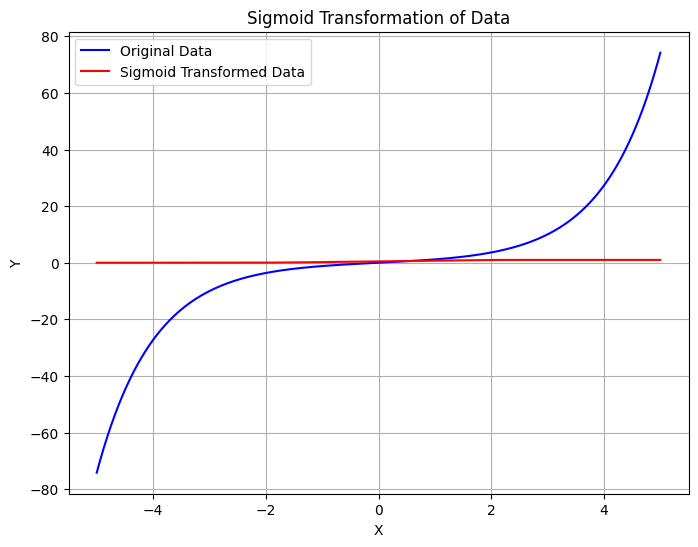

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
X = np.linspace(-5, 5, 10000)
y = np.sinh(X)  # Example data, replace with your own

# Apply sigmoid function to the data
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

y_sigmoid = sigmoid(y)

# Plot the original and transformed data
plt.figure(figsize=(8, 6))
plt.plot(X, y, label='Original Data', color='blue')
plt.plot(X, y_sigmoid, label='Sigmoid Transformed Data', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sigmoid Transformation of Data')
plt.legend()
plt.grid(True)
plt.show()


**LINEAR SVM**

In [146]:
# Tuning Dataset
# dropping columns to make it suitable for 2D data
df2 = df2.drop(columns=["city"])
#dropping rows to reduce complexity
df1=df1[150:390]


In [147]:
# setting a target variable
x=df2.drop(columns=['placement'])
y=df2['placement']

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [149]:
x_train = x_train.fillna(x_train.mean())

In [152]:
x_test = x_test.fillna(x_train.mean())

In [153]:
#Training a Linear SVM Model
#fitting data to SVM
from sklearn import svm
model=svm.SVC(kernel='linear',C=1.0)

model.fit(x_train,y_train)


SVC(kernel='linear')

In [154]:
#printing the accuracy using score function
print(f"Accuracy : {(model.score(x_test,y_test))*100} %")

Accuracy : 85.0 %


In [155]:
#displaying classification report
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



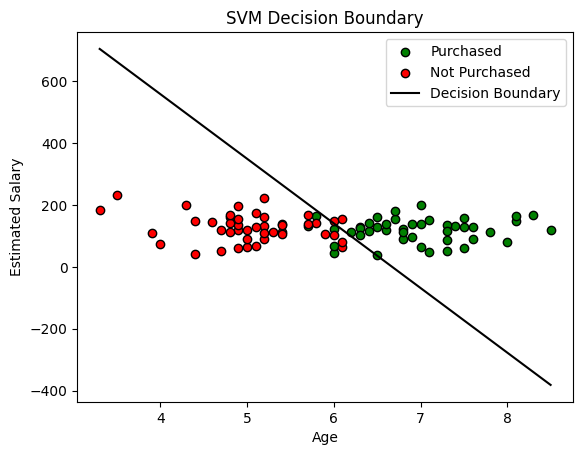

In [160]:
#splitting binary result for plotting
placed_data = df2[df2["placement"] == 1]
not_placed_data = df2[df2["placement"] == 0]
#plotting datapoints
plt.scatter(placed_data["cgpa"], placed_data["iq"], color='green', edgecolors='k', label='Purchased')
plt.scatter(not_placed_data["cgpa"], not_placed_data["iq"], color='red', edgecolors='k', label='Not Purchased')

#extracting values of decision boundary
w = model.coef_[0]
a = -w[0] / w[1]  # slope of the decision boundary
xx = np.linspace(df2["cgpa"].min(), df2["cgpa"].max())
yy = a * xx - (model.intercept_[0]) / w[1]  # equation of the decision boundary

# Plotting decision boundary
plt.plot(xx, yy, 'k-', label='Decision Boundary')

#plotting labels
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.title('SVM Decision Boundary')
plt.show()

Hyperparameter Tuning

In [165]:
#independent features
x=df2.drop(columns=['placement'])
#dependent feature
y=df2['placement']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [168]:
#Standardization
from sklearn.preprocessing import StandardScaler
#creating an instance of standard scaler
scaler = StandardScaler()
#scaling x train and x test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [170]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy if needed
x_train_imputed = imputer.fit_transform(x_train_scaled)
x_test_imputed = imputer.transform(x_test_scaled)

In [171]:
from sklearn.svm import SVC
#creating an instance for default svm kernel='rbf',C=1.0,gamma=auto
svc=SVC()
#fitting data using imputed data
svc.fit(x_train_imputed,y_train)
#testing model using imputed data
y_pred=svc.predict(x_test_imputed)
#displaying accuracy using score function
print(f"Accuracy : {(svc.score(x_test_imputed,y_test))*100} %")

Accuracy : 85.0 %


Confusion matrix

 [[9 1]
 [2 8]]

True Positives(TP) =  9

True Negatives(TN) =  8

False Positives(FP) =  1

False Negatives(FN) =  2


<Axes: >

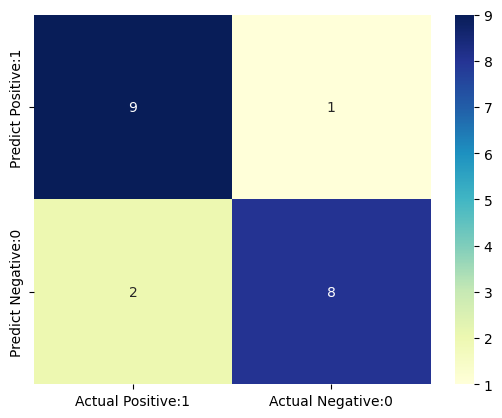

In [172]:
from sklearn.metrics import confusion_matrix
#calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
#displaying values of confusion matrix
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
index=['Predict Positive:1', 'Predict Negative:0'])
#plotting confusion matrix
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [173]:
#Classification Report
from sklearn.metrics import classification_report
#displaying classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [176]:
#Hyper Parameter Tuning Using Grid Search
from sklearn.model_selection import GridSearchCV

# parameters for cross validation
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
{'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
{'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':
[0.01,0.02,0.03,0.04,0.05]}]

#performing gridsearch
grid_search = GridSearchCV(estimator = svc,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=2)
# Use the imputed data here instead of x_train_scaled
grid_search.fit(x_train_imputed, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ...............................C=100, kernel=linear; total time=   0.0s
[CV] END ...............................C=100,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy', verbose=2)

In [177]:
#displaying best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'kernel': 'linear'}


**BERNOULLI NAIVE BAYES**

In [178]:
# Split the dataset into features (X) and target variable (Y)
X = df2.drop('placement', axis=1)
Y = df2['placement']



In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

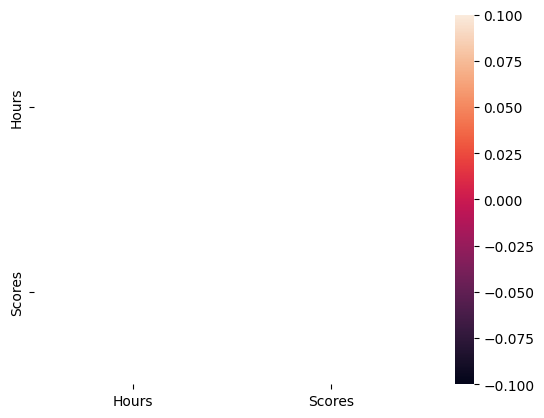

In [180]:
corr=df1.corr()
sns.heatmap(corr,annot=True)

In [181]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [183]:
# Import the SimpleImputer class for handling missing values
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [185]:
# Instantiate the BernoulliNB Naive Bayes classifier
classifier = BernoulliNB()
# Train the classifier
classifier.fit(X_train_imputed, Y_train)

BernoulliNB()

In [188]:
# Predicting the Test set results
classifier = BernoulliNB()
classifier.fit(X_train_imputed, Y_train)
y_pred = classifier.predict(X_test_imputed)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [193]:
# Predict Output for a sample
sample_index = 5  # Choose any index from the test set
sample_features = X_test_scaled[sample_index].reshape(1, -1)  # Reshape the sample for prediction

predicted = classifier.predict(sample_features)

print("Sample Index:", sample_index)
print("Actual Value:", Y_test.iloc[sample_index])
print("Predicted Value:", predicted[0])

Sample Index: 5
Actual Value: 0
Predicted Value: 0


In [194]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[10  0]
 [10  0]]


In [195]:
accuray = accuracy_score(y_pred, Y_test)
print(accuray*100)

50.0


In [196]:
# Classification Report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**GAUSSIAN NAIVE BAYES**

In [197]:
# Declare feature vector (X) & target vector (Y)
X = merged_df.drop('placement', axis=1)
Y = merged_df['placement']

In [198]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

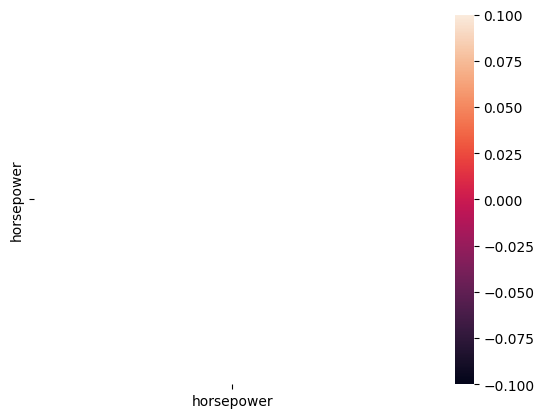

In [199]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [200]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [201]:
# Convert the target variable to categorical values
Y_train_cat = pd.cut(Y_train, bins=5, labels=False)  # Adjust the number of bins as needed

# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train_scaled, Y_train_cat)  # Use the categorized target variable

GaussianNB()

In [202]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)
print(y_pred)

[4 4 4 4 0 0 0 4 0 0 0 4 4 4 0 0 4 4 4]


In [204]:
# Predict Output for a sample
sample_index = 5  # Choose any index from the test set
sample_features = X_test_scaled[sample_index].reshape(1, -1)  # Reshape the sample for prediction

predicted = classifier.predict(sample_features)

print("Sample Index:", sample_index)
print("Actual Value:", Y_test.iloc[sample_index])
print("Predicted Value:", predicted[0])


Sample Index: 5
Actual Value: -0.9464847243000455
Predicted Value: 0


In [205]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Convert Y_test to discrete values if it's continuous
Y_test_cat = pd.cut(Y_test, bins=5, labels=False)  # Adjust bins as needed to match y_pred categories

cm = confusion_matrix(Y_test_cat, y_pred)
print(cm)

[[7 2]
 [1 9]]


In [206]:
# Classification Report
from sklearn.metrics import classification_report
# Convert Y_test to discrete values if it's continuous
Y_test_cat = pd.cut(Y_test, bins=5, labels=False)  # Adjust bins and labels as needed
class_report = classification_report(Y_test_cat, y_pred) # Use the discretized Y_test
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           4       0.82      0.90      0.86        10

    accuracy                           0.84        19
   macro avg       0.85      0.84      0.84        19
weighted avg       0.85      0.84      0.84        19



Index(['horsepower'], dtype='object')


<ipython-input-208-c6cd782b3b11>:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_red[:, 0], X_test_red[:, 1], c=Y_test_red, edgecolor='k', marker='x')


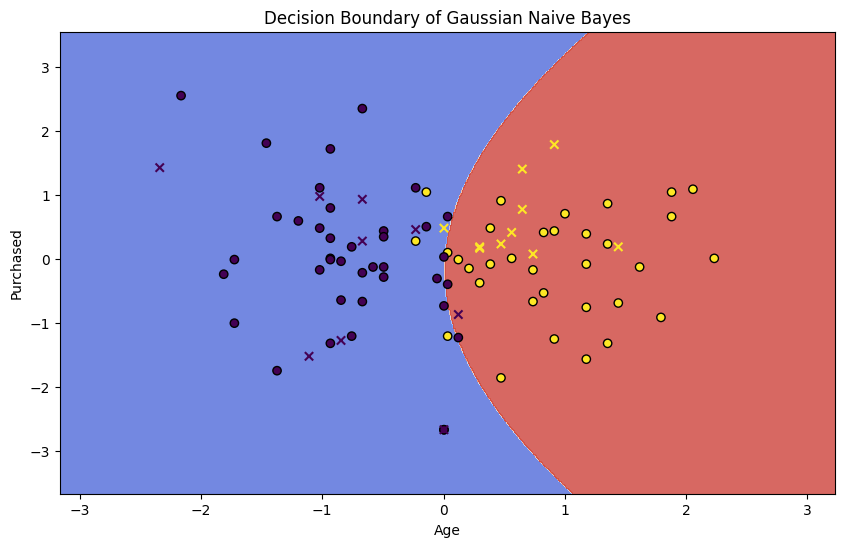

In [208]:
# Print available columns to verify names
print(df.columns)

# Selecting two features, use the correct column names from the output above
X_reduced = merged_df[['cgpa', 'iq']]
X_reduced_scaled = scaler.fit_transform(X_reduced)
X_train_red, X_test_red, Y_train_red, Y_test_red = train_test_split(X_reduced_scaled, Y, test_size=0.2, random_state=42)

# Convert Y_train_red to discrete labels if it contains continuous values
# Assuming 'Y' represents a binary outcome (e.g., purchase or not), you can use a threshold:
threshold = 0.5  # Adjust this threshold based on your problem
Y_train_red_discrete = (Y_train_red > threshold).astype(int)

# Training the model on reduced features using the discretized labels
classifier.fit(X_train_red, Y_train_red_discrete)  # Use the discretized labels
# Create a mesh to plot the decision boundary
x_min, x_max = X_train_red[:, 0].min() - 1, X_train_red[:, 0].max() + 1
y_min, y_max = X_train_red[:, 1].min() - 1, X_train_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_red[:, 0], X_train_red[:, 1], c=Y_train_red, edgecolor='k', marker='o')
plt.scatter(X_test_red[:, 0], X_test_red[:, 1], c=Y_test_red, edgecolor='k', marker='x')
plt.title("Decision Boundary of Gaussian Naive Bayes")
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.show()


**MULTINOMINAL NAIVE BAYES**

In [210]:
from sklearn.naive_bayes import MultinomialNB
# Split the dataset into features (X) and target variable (Y)
X = df2.drop('placement', axis=1)
Y = df2['placement']

In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [217]:
# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [218]:
# Scale the data (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [220]:
# Instantiate and train the classifier
classifier = MultinomialNB()
classifier.fit(X_train_imputed, Y_train)  # Use imputed data, skip scaling


MultinomialNB()

In [227]:
# Predicting the Test set results using the imputed test data
y_pred = classifier.predict(X_test_imputed)
print(y_pred)


[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0]


In [226]:
# Recheck your train-test split to ensure consistency
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verify the shapes of your data
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

# Handle the missing values in X_train and X_test before scaling
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Instantiate the Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the training data (without scaling)
classifier.fit(X_train, Y_train) # MultinomialNB works best with count data, avoid scaling

# Predicting the Test set results
y_pred = classifier.predict(X_test) # Use test data without scaling
print(y_pred)

# Predict Output for a sample
sample_index = 4  # Choose any index from the test set
sample_features = X_test[sample_index].reshape(1, -1)  # Reshape the sample for prediction, no scaling

predicted = classifier.predict(sample_features)

print("Sample Index:", sample_index)
print("Actual Value:", Y_test.iloc[sample_index])
print("Predicted Value:", predicted[0])

Shape of X_train: (80, 2)
Shape of Y_train: (80,)
Shape of X_test: (20, 2)
Shape of Y_test: (20,)
[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0]
Sample Index: 4
Actual Value: 1
Predicted Value: 1


In [230]:
# Instantiate the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
# Train the classifier on the original training data (not scaled)
classifier.fit(X_train, Y_train) # Use original training data

# Predicting the Test set results
# Use the original (not scaled) test data
y_pred = classifier.predict(X_test)
print(y_pred)

# Predict Output for a sample
sample_index = 4  # Choose any index from the test set
# Reshape the sample from the original test set (not scaled) for prediction
# Use array indexing instead of .iloc
sample_features = X_test[sample_index].reshape(1, -1)

predicted = classifier.predict(sample_features)

print("Sample Index:", sample_index)
print("Actual Value:", Y_test.iloc[sample_index])
print("Predicted Value:", predicted[0])

[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0]
Sample Index: 4
Actual Value: 1
Predicted Value: 1


In [231]:
# Predict Output for a sample
sample_index = 0  # Choose any index from the test set
sample_features = X_test_scaled[sample_index].reshape(1, -1)  # Reshape the sample for prediction

predicted = classifier.predict(sample_features)

print("Sample Index:", sample_index)
print("Actual Value:", Y_test.iloc[sample_index])
print("Predicted Value:", predicted[0])



Sample Index: 0
Actual Value: 1
Predicted Value: 1


In [232]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[9 1]
 [5 5]]


In [233]:
accuray = accuracy_score(y_pred, Y_test)
print(accuray)

0.7


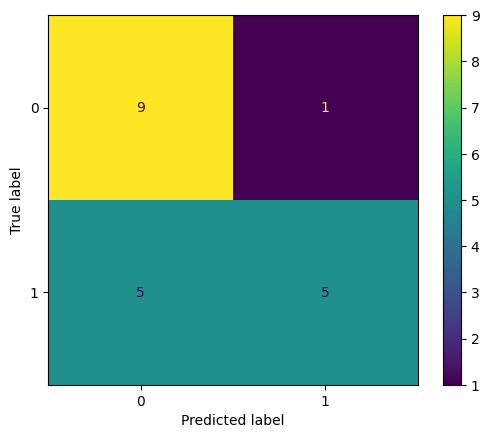

In [234]:
labels = [0,1]
cm = confusion_matrix(Y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();


In [235]:
# Classification Report
class_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.83      0.50      0.62        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20



K-Means Clustering

In [236]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(merged_df)

print(df_normalized)

[[0.10909091 0.         1.         0.67307692 0.52586207 1.        ]
 [0.58181818 0.47272727 0.5        0.5        0.45258621 0.        ]
 [0.23636364 0.10909091 0.         0.51254181 0.51724138 0.        ]
 [0.29090909 0.16363636 0.5        0.48076923 0.60775862 0.        ]
 [0.65454545 0.70909091 0.5        0.32692308 0.26724138 0.        ]
 [0.14545455 0.07272727 1.         0.34615385 0.28017241 0.        ]
 [0.72727273 0.74545455 0.         0.69230769 0.59051724 1.        ]
 [0.47272727 0.36363636 1.         0.40384615 0.59482759 0.        ]
 [0.25454545 0.38181818 0.5        0.59615385 0.49568966 1.        ]
 [0.10909091 0.16363636 0.5        0.36538462 0.9612069  0.        ]
 [0.         0.05454545 0.         0.         0.78448276 0.        ]
 [0.76363636 0.83636364 1.         0.13461538 0.5092559  0.        ]
 [1.         0.87272727 0.5        0.36538462 0.56465517 0.        ]
 [0.14545455 0.16363636 0.         0.63461538 0.51293103 1.        ]
 [0.52727273 0.6        1.        

In [237]:
#Kmeans Model Fit
from sklearn.cluster import KMeans
from sklearn import metrics
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(df_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

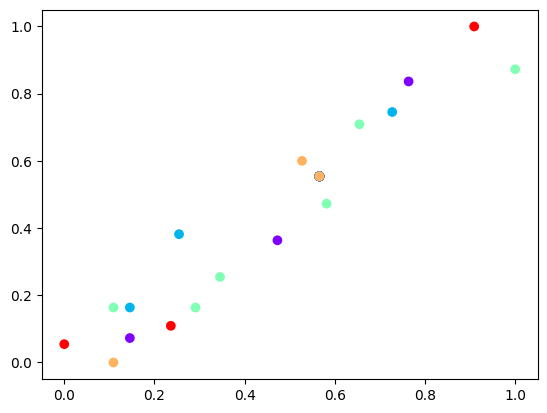

In [238]:
#Visualisation
plt.scatter(df_normalized[:, 0], df_normalized[:, 1], c=kmeans_model.labels_, cmap='rainbow', label="points")
plt.show()

In [239]:
#Centroids of the clusters
kmeans_model.cluster_centers_

array([[ 5.41538462e-01,  5.24195804e-01,  1.00000000e+00,
         3.70787240e-01,  4.82807483e-01, -5.55111512e-17],
       [ 5.43888112e-01,  5.39888112e-01,  2.30769231e-01,
         7.11281194e-01,  5.37325492e-01,  1.00000000e+00],
       [ 5.44076555e-01,  5.17933014e-01,  5.00000000e-01,
         3.40741067e-01,  4.85480944e-01,  0.00000000e+00],
       [ 5.36684492e-01,  5.24278075e-01,  1.00000000e+00,
         6.73076923e-01,  5.01014199e-01,  1.00000000e+00],
       [ 5.31318182e-01,  5.23000000e-01,  0.00000000e+00,
         3.34082358e-01,  5.36408235e-01, -5.55111512e-17]])

In [240]:
inertia = kmeans_model.inertia_ #finding the inertia od the model
print(inertia)

10.180907914365108


In [241]:
silhouette_score = metrics.silhouette_score(df_normalized, kmeans_model.labels_) #calculatinfg the silouhtte score
print(silhouette_score)

0.42247536663167756


In [242]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
k_range = range(2, 11)

In [243]:
#updating the silouhtte score and inertia scores
silhouette_scores = []
inertia_values = []
for k in k_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_normalized)
  silhouette_score = metrics.silhouette_score(df_normalized, kmeans.labels_)
  silhouette_scores.append(silhouette_score)
  inertia = kmeans.inertia_
  inertia_values.append(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

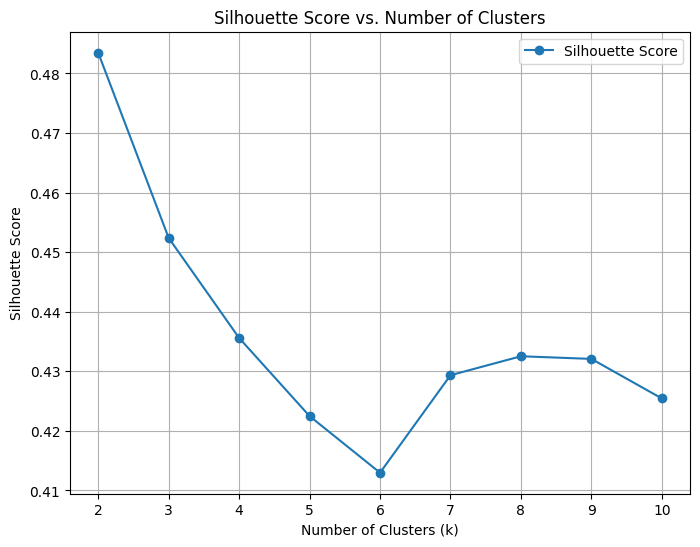

In [244]:
#Visualisation
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


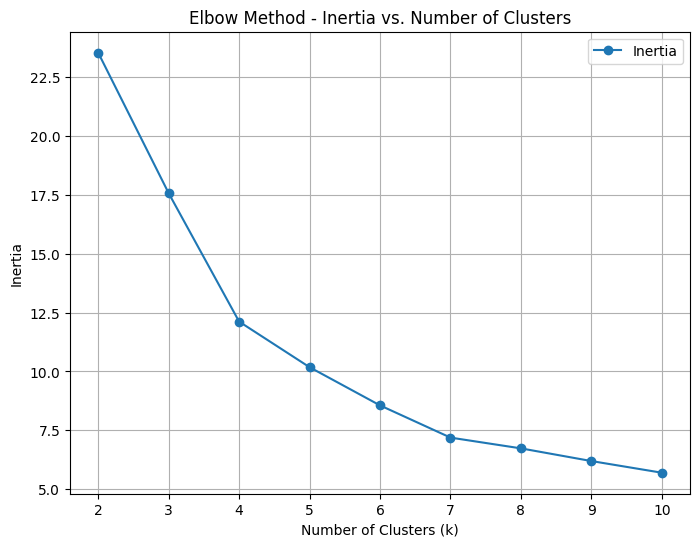

In [245]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

**AGGOLOMERATIVE CLUSTERING**

## Using the dendrogram to find the optimal number of clusters

PCA

In [247]:
# Apply PCA
from sklearn.decomposition import PCA

# Drop rows with any missing values
X_clean = X.dropna()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

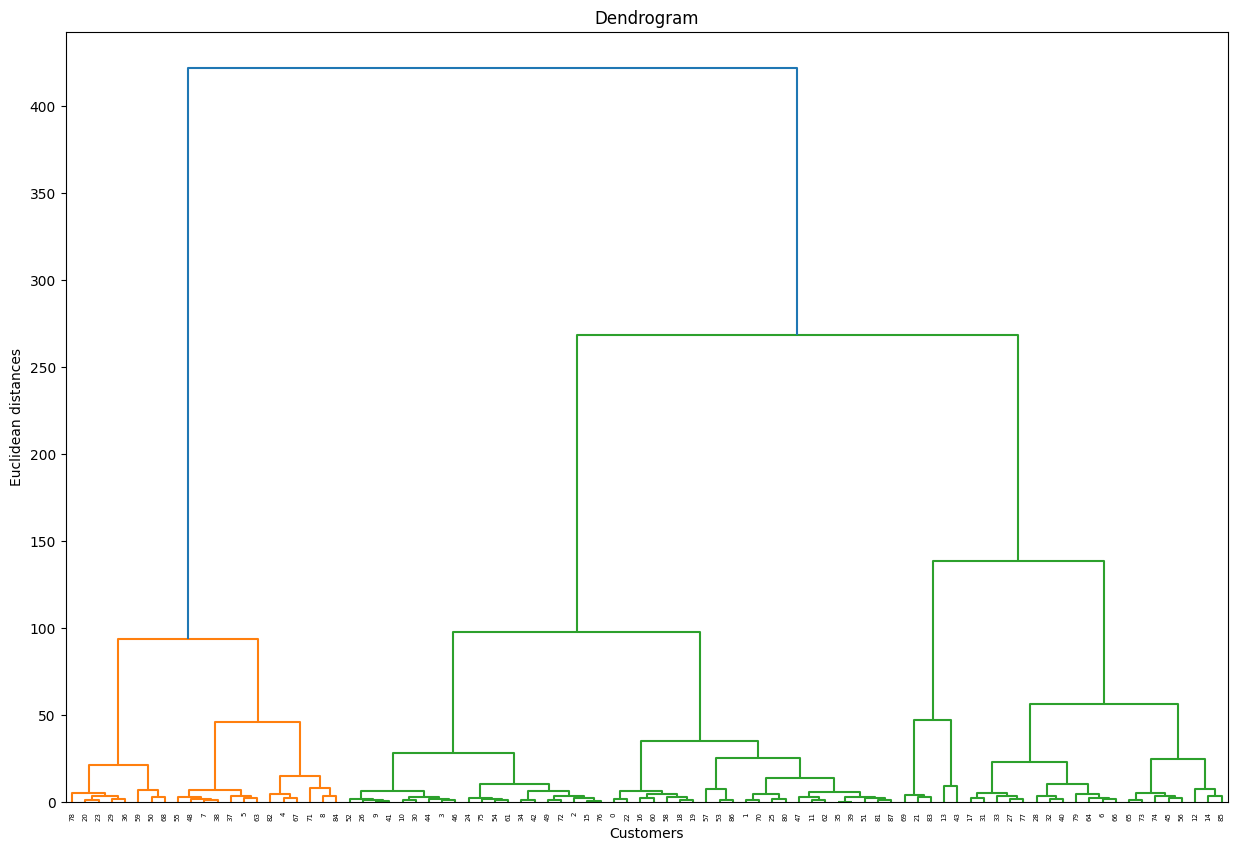

In [248]:
import scipy.cluster.hierarchy as sch
# Plot Dendrogram
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [249]:
from sklearn.cluster import AgglomerativeClustering
# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Visualising the clusters

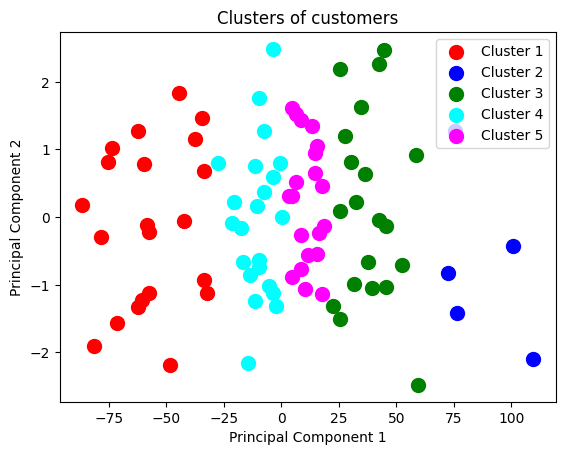

In [250]:
# Plot clusters
plt.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_hc == 2, 0], X_pca[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_pca[y_hc == 3, 0], X_pca[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_pca[y_hc == 4, 0], X_pca[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

**DBSCAN CLUSTERING**

In [251]:
from sklearn.cluster import DBSCAN


In [253]:

# Selecting relevant features for clustering
X = merged_df.iloc[:, 4:]
X.drop(['placement'], axis=1, inplace=True)

In [254]:
# Standardize the features
X = StandardScaler().fit_transform(X)

In [255]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X) #fit DBSCAN into the model
labels = db.labels_

In [256]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Print results
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 1
Estimated number of noise points: 11
Silhouette Coefficient: 0.523


In [258]:
# Perform PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

Text(0, 0.5, 'PCA Component 2')

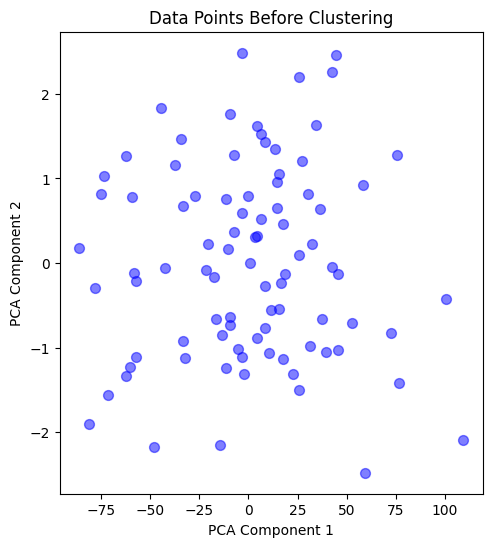

In [259]:
# Plot before clustering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', s=50, alpha=0.5)
plt.title('Data Points Before Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

Shape of X_pca: (88, 2)
Shape of labels: (91,)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 88 but corresponding boolean dimension is 91

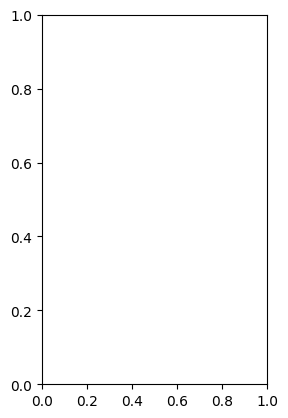

In [264]:
# Plot after clustering
plt.subplot(1, 2, 2)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in range(len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Ensure X_pca and labels correspond to the same dataset
    # Check the shapes of X_pca and labels, and adjust the data preprocessing steps
    # to ensure they are derived from the same source.
    print("Shape of X_pca:", X_pca.shape)
    print("Shape of labels:", labels.shape)

    xy = X_pca[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=50, alpha=0.5, label=f'Cluster {k}')



plt.title('Data Points After DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

**DECISION TREE**

In [265]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

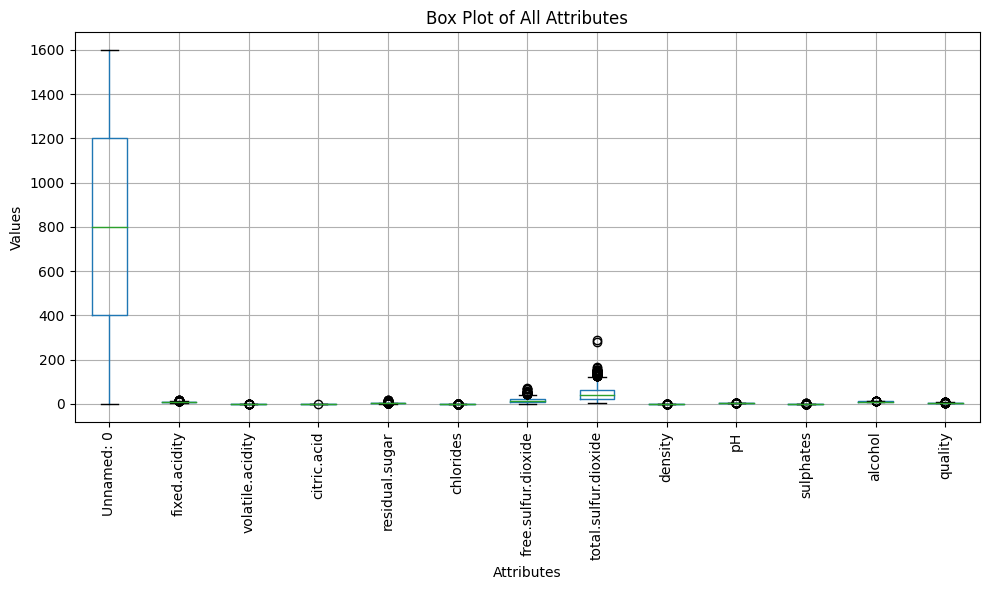

In [266]:
#Create box plots for all attributes
plt.figure(figsize=(10, 6))  # Set the figure size
df4.boxplot()  # Create box plots for all attributes
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of All Attributes')
plt.ylabel('Values')
plt.xlabel('Attributes')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [271]:
from sklearn.model_selection import train_test_split
# Assuming 'quality' is the column you want to predict
# Define all feature names in a list
feature_names = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar']

# Define the 'quality' variable as a string
quality = 'quality'  # Replace 'quality' with the actual column name if different

X = df4[quality]

y = df4['quality'] # Target variable
#spliting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(set(y))

{3, 4, 5, 6, 7, 8}


In [273]:
#describing the decision tree as the training model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=2)
# Reshape X to be a 2D array
X_reshaped = X.values.reshape(-1, 1)
model.fit(X_reshaped, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

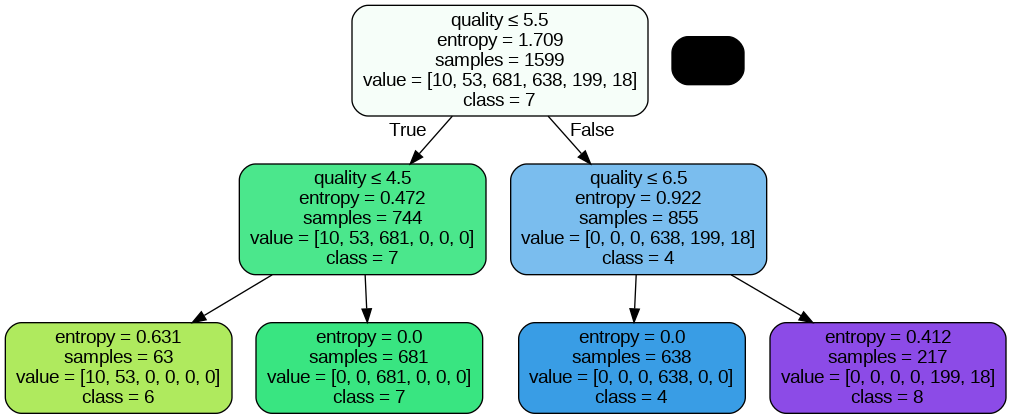

In [277]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Get unique classes from your target variable
class_names = [str(c) for c in df4['quality'].unique()]  # Adjust 'quality' if needed

# Generate DOT data
dot_data = export_graphviz(model, out_file=None, feature_names=feature_names,
                           class_names=class_names,  # Use dynamically generated class names
                           filled=True, rounded=True,
                           special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# To save the visualization to a file
graph.write_png("decision_tree.png")

Image(graph.create_png())

In [279]:
model = DecisionTreeClassifier(criterion='gini',max_depth=2)
# Reshape X to be a 2D array
X_reshaped = X.values.reshape(-1, 1)
model.fit(X_reshaped, y) #Fitting the training model

DecisionTreeClassifier(max_depth=2)

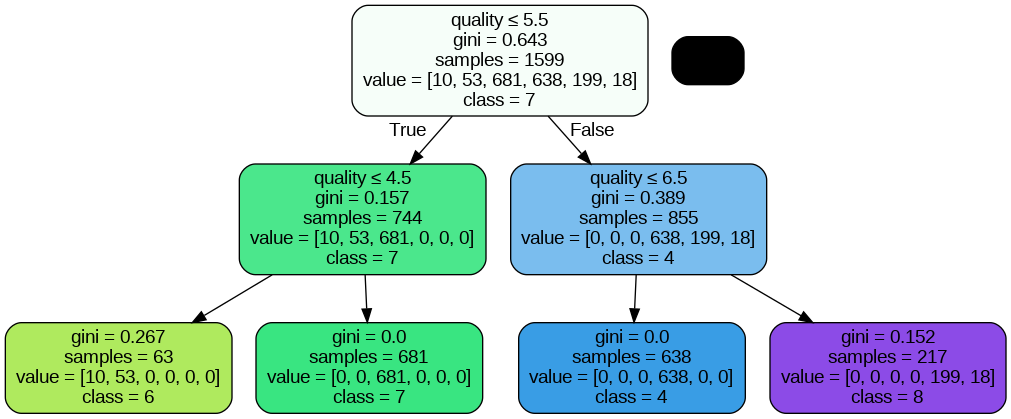

In [282]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Get unique classes from your target variable
class_names = [str(c) for c in df4['quality'].unique()]  # Adjust 'quality' if needed

# Generate DOT data
dot_data = export_graphviz(model, out_file=None, feature_names=feature_names,
                           class_names=class_names,  # Use dynamically generated class names
                           filled=True, rounded=True,
                           special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# To save the visualization to a file
graph.write_png("decision_tree.png")

Image(graph.create_png())

In [285]:
expected = df4['quality']
# Estimating Class Probabilities
# Reshape X to be a 2D array if it's not already
if X.ndim == 1:
    X_reshaped = X.values.reshape(-1, 1)
else:
    X_reshaped = X
probabilities = model.predict_proba(X_reshaped) # Use the reshaped X
print("Estimated class probabilities:", probabilities)

Estimated class probabilities: [[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [287]:
#predicted score value of model
# Reshape X to be a 2D array if it's not already
if X.ndim == 1:
    X_reshaped = X.values.reshape(-1, 1)
else:
    X_reshaped = X

predicted=model.predict(X_reshaped) # Use the reshaped X
print(predicted)
# Calculate the R^2 score
model.score(X_reshaped,y) # Use the reshaped X here as well

[5 5 5 ... 6 5 6]


0.9824890556597874

In [288]:
#expected value of y
expected=y
print(expected)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


[0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009
 0.17043009 0.17043009 0.17043009 0.17043009 0.17043009 0.1704

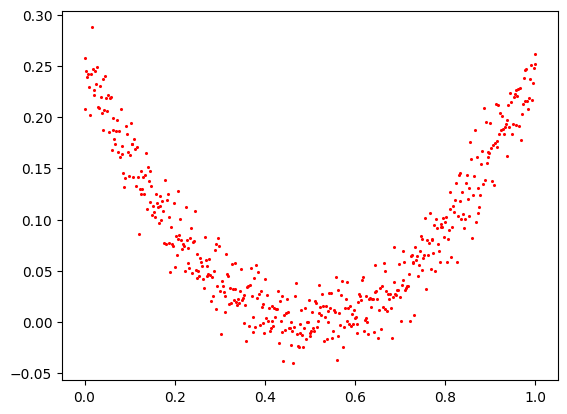

In [289]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
X = np.linspace(start=0, stop=1, num=500)
y = (X-0.5)**2 + np.random.randn(500)/50
plt.scatter(X, y, s=1.5, c='red')
model = DecisionTreeRegressor(max_depth=2)
model.fit(X.reshape(-1, 1),y)
DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None)
''' " max_leaf_nodes=None, min_impurity_decrease=0.0,\n",
 " min_impurity_split=None, min_samples_leaf=1,\n",
 " min_samples_split=2, min_weight_fraction_leaf=0.0,\n",
 " presort=False, random_state=None, splitter='best')"'''
export_graphviz(model)
predicted = model.predict(X.reshape(-1, 1))
print(predicted)